# **–ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö.**

In [1]:
!pip install catboost lightgbm xgboost -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 6.1 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostRegressor, Pool

import lightgbm as lgb
from lightgbm import Dataset, LGBMRegressor

import xgboost as xgb
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/quickstart_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/quickstart_test.csv')

In [5]:
RANDOM_STATE = 25

In [7]:
results = [] # –ó–¥–µ—Å—å –±—É–¥–µ–º —Ö—Ä–∞–Ω–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏

# **EDA (Exploratory Data Analysis)**

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   car_id                    2337 non-null   object 
 1   model                     2337 non-null   object 
 2   car_type                  2337 non-null   object 
 3   fuel_type                 2337 non-null   object 
 4   car_rating                2337 non-null   float64
 5   year_to_start             2337 non-null   int64  
 6   riders                    2337 non-null   int64  
 7   year_to_work              2337 non-null   int64  
 8   target_reg                2337 non-null   float64
 9   target_class              2337 non-null   object 
 10  mean_rating               2337 non-null   float64
 11  distance_sum              2337 non-null   float64
 12  rating_min                2337 non-null   float64
 13  speed_max                 2337 non-null   float64
 14  user_rid

In [12]:
train.describe().T

count          mean           std           min  \
car_rating                2337.0  4.354292e+00  9.969540e-01  9.800000e-01   
year_to_start             2337.0  2.014041e+03  1.685852e+00  2.011000e+03   
riders                    2337.0  6.371144e+04  3.375501e+04  2.300000e+01   
year_to_work              2337.0  2.018070e+03  2.159484e+00  2.014000e+03   
target_reg                2337.0  4.494738e+01  1.764753e+01  1.764000e+01   
mean_rating               2337.0  4.478831e+00  4.185875e-01  3.529885e+00   
distance_sum              2337.0  1.356912e+07  4.253209e+06  1.478866e+06   
rating_min                2337.0  1.388703e-01  1.639783e-01  0.000000e+00   
speed_max                 2337.0  1.609849e+02  3.321116e+01  9.142351e+01   
user_ride_quality_median  2337.0 -3.293389e-01  9.581800e+00 -3.811634e+01   
deviation_normal_count    2337.0  1.740000e+02  0.000000e+00  1.740000e+02   
user_uniq                 2337.0  1.716243e+02  3.158088e+00  1.360000e+02   

                                   25%           50%           75%  \
car_rating                3.740000e+00  4.360000e+00  5.000000e+00   
year_to_start             2.013000e+03  2.014000e+03  2.015000e+03   
riders                    4.105300e+04  6.441500e+04  8.651500e+04   
year_to_work              2.016000e+03  2.018000e+03  2.020000e+03   
target_reg                3.157000e+01  4.001000e+01  5.472000e+01   
mean_rating               4.155747e+00  4.442989e+00  4.675345e+00   
distance_sum              1.058758e+07  1.321852e+07  1.631788e+07   
rating_min                1.000000e-01  1.000000e-01  1.000000e-01   
speed_max                 1.236092e+02  1.724357e+02  1.885974e+02   
user_ride_quality_median -6.141569e+00 -1.958600e-01  5.370422e+00   
deviation_normal_count    1.740000e+02  1.740000e+02  1.740000e+02   
user_uniq                 1.710000e+02  1.720000e+02  1.730000e+02   

                                   max  
car_rating                8.900000e+00  
year_to_start             2.017000e+03  
riders                    1.428620e+05  
year_to_work              2.022000e+03  
target_reg                1.411300e+02  
mean_rating               5.700747e+00  
distance_sum              3.119785e+07  
rating_min                1.500000e+00  
speed_max                 2.099828e+02  
user_ride_quality_median  3.577049e+01  
deviation_normal_count    1.740000e+02  
user_uniq                 1.740000e+02

In [14]:
train.isnull().sum()

car_id                      0
model                       0
car_type                    0
fuel_type                   0
car_rating                  0
year_to_start               0
riders                      0
year_to_work                0
target_reg                  0
target_class                0
mean_rating                 0
distance_sum                0
rating_min                  0
speed_max                   0
user_ride_quality_median    0
deviation_normal_count      0
user_uniq                   0
dtype: int64

In [16]:
test.isnull().sum()

car_id                      0
model                       0
car_type                    0
fuel_type                   0
car_rating                  0
year_to_start               0
riders                      0
year_to_work                0
target_class                0
mean_rating                 0
distance_sum                0
rating_min                  0
speed_max                   0
user_ride_quality_median    0
deviation_normal_count      0
user_uniq                   0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'target_reg'
plt.figure(figsize=(8,4))
sns.histplot(train['target_reg'], bins=50, kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ target_reg');

In [39]:
import pylab 
import scipy.stats as stats
  
stats.probplot(train['target_reg'], dist="norm", plot=pylab)
pylab.show()

–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Å–∏–ª—å–Ω–æ —Å–º–µ—â–µ–Ω–∞ –≤–ª–µ–≤–æ, –ø–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(train['target_reg']), bins=50, kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ target_reg');

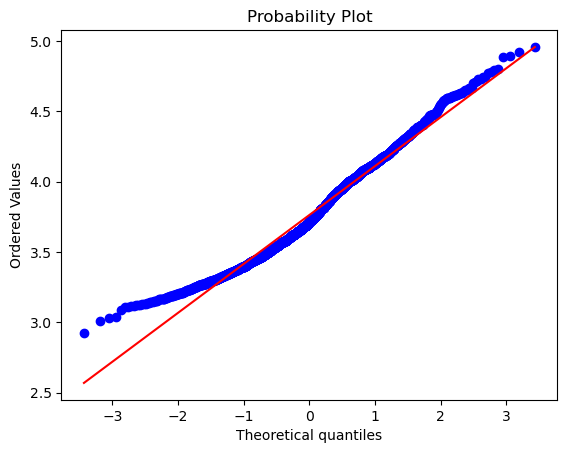

In [37]:
stats.probplot(np.log1p(train['target_reg']), dist="norm", plot=pylab)
pylab.show()

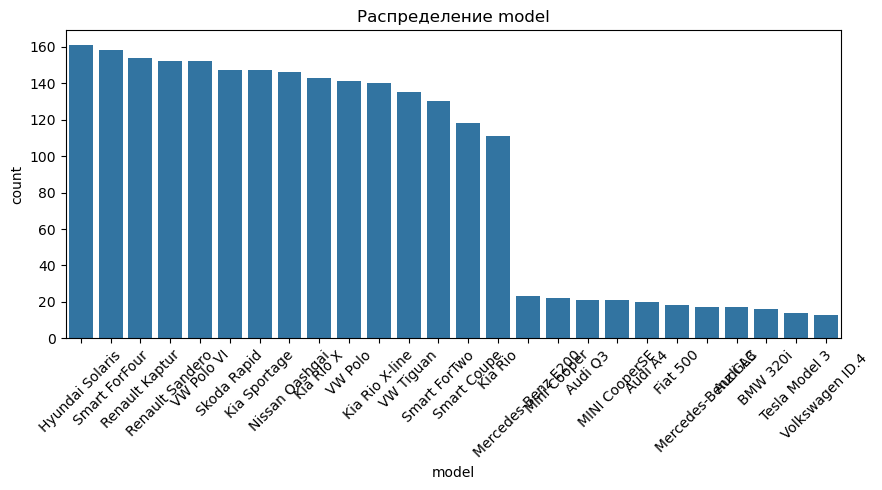

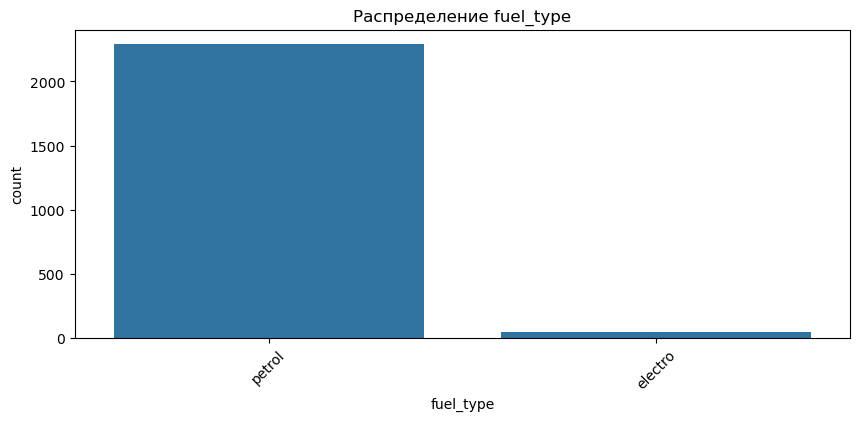

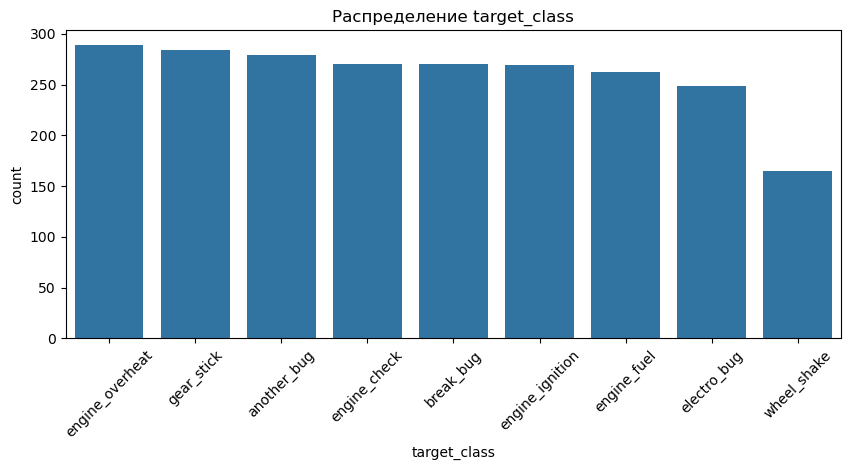

In [35]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤ categorical –∫–æ–ª–æ–Ω–∫–∞—Ö
categorical_cols = ['model', 'car_type', 'fuel_type','target_class']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {col}')
    plt.xticks(rotation=45)

Text(0.5, 1.0, '–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å target_reg')

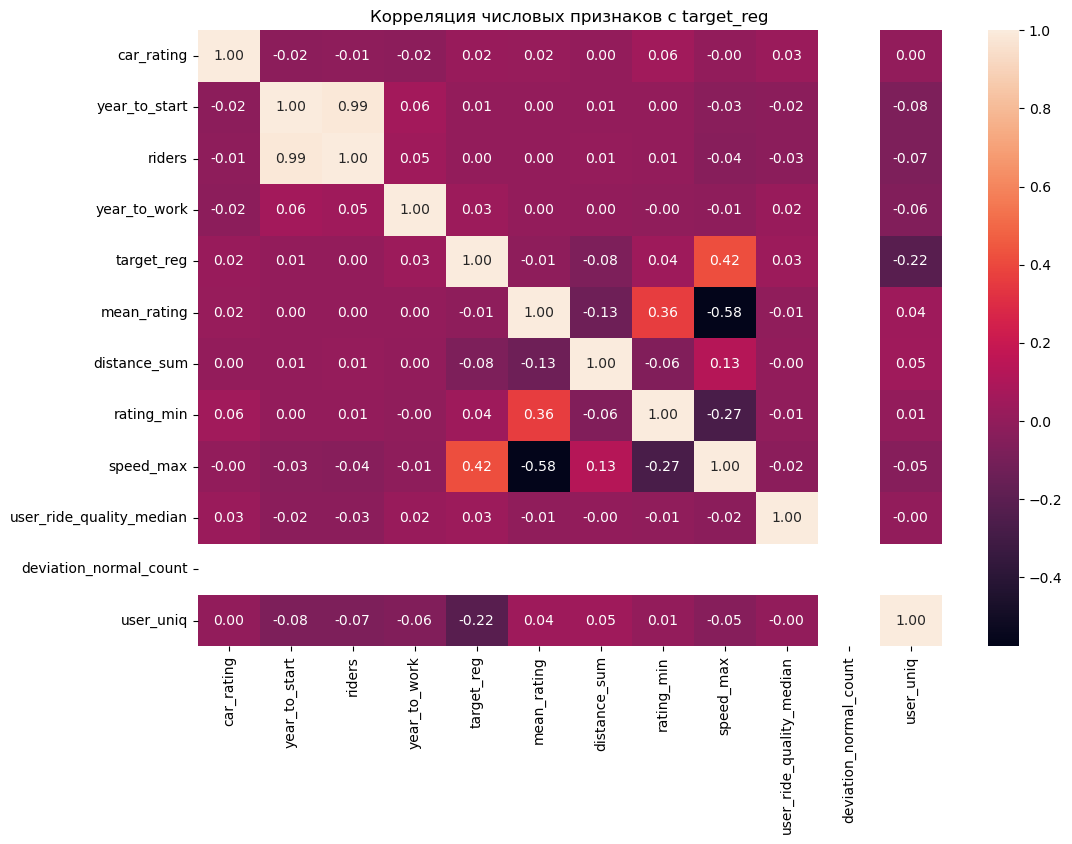

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt='.2f')
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å target_reg')

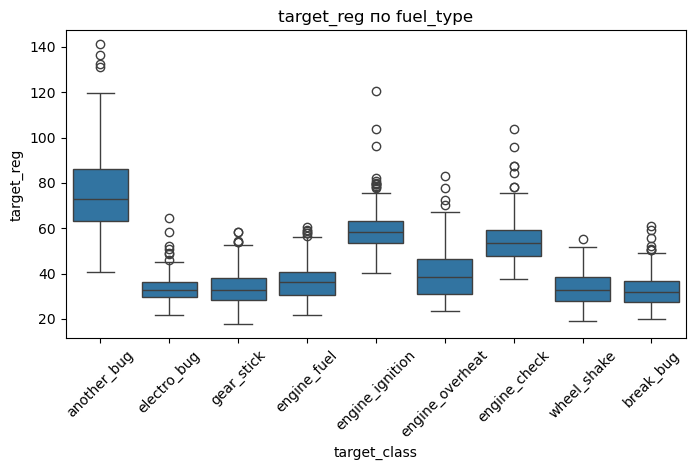

In [55]:
# –ê–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ target_reg –æ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –Ω–∞–ø—Ä–∏–º–µ—Ä, fuel_type
plt.figure(figsize=(8,4))
sns.boxplot(x='target_class', y='target_reg', data=train)
plt.title('target_reg –ø–æ fuel_type')
plt.xticks(rotation=45);

–í–∏–¥–∏–º —á—Ç–æ —Ä–∞–∑–Ω—ã–µ –∫–ª–∞—Å—Å—ã –∏–º–µ—é—Ç —Ä–∞–∑–Ω—ã–µ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ —Ä–∞–∑–±—Ä–æ—Å—ã —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∫–ª–∞—Å—Å –º–∞—à–∏–Ω—ã —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–π –º–æ–¥–µ–ª–∏ –º—ã —É–±–µ—Ä–µ–º —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫

In [53]:
# –ê–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ target_reg –æ—Ç –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª—è
plt.figure(figsize=(12,6))
top_models = train['model'].value_counts().nlargest(10).index
sns.boxplot(x='model', y='target_reg', data=train[train['model'].isin(top_models)])
plt.title('target_reg –ø–æ —Ç–æ–ø-10 –º–æ–¥–µ–ª–µ–π')
plt.xticks(rotation=45);

–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–µ–ª–∏ –∏–º–µ—é—Ç —Å—Ç–∞–±–∏–ª—å–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –¥—Ä—É–≥–∏–µ —à–∏—Ä–æ–∫–∏–π —Ä–∞–∑–±—Ä–æ—Å. –≠—Ç–æ –ª–æ–≥–∏—á–Ω–æ —Ä–∞–∑–Ω—ã–µ –º–æ–¥–µ–ª–∏ –º–æ–≥—É—Ç —Ä–∞–∑–ª–∏—á–∞—Ç—å—Å—è –ø–æ —Å—Ç–æ–∏–º–æ—Å—Ç–∏, —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º –∏ –¥—Ä—É–≥–∏–º —Ñ–∞–∫—Ç–æ—Ä–∞–º, –≤–ª–∏—è—é—â–∏–º –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é.

#  **–û–ø—Ä–µ–¥–µ–ª–∏–º –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏.**

In [41]:
def train_model(algorithm,
                X,
                y,
                early_stopping_rounds,
                init_params=None,
                cat_features=None,
                random_seed=25):

    scores = []
    models = []
    kf = KFold(n_splits=3, shuffle=True, random_state=random_seed)

    print(f"========= TRAINING {algorithm.__name__} =========")

    for num_fold, (train_index, val_index) in enumerate(kf.split(X)):
        X_train, X_eval = X.iloc[train_index], X.iloc[val_index]
        y_train, y_eval = y.iloc[train_index], y.iloc[val_index]

        if init_params:
            model = algorithm(**init_params)
        else:
            model = algorithm()

        if algorithm.__name__ == 'CatBoostRegressor':
            train_dataset = Pool(X_train, y_train, cat_features=cat_features)
            eval_dataset = Pool(X_eval, y_eval, cat_features=cat_features)
            model.fit(train_dataset,
                      eval_set=eval_dataset,
                      verbose=0,
                      early_stopping_rounds=early_stopping_rounds)
            y_pred = model.predict(X_eval)

        elif algorithm.__name__ == 'LGBMRegressor':
            train_dataset = lgb.Dataset(X_train, y_train, categorical_feature=cat_features)
            eval_dataset = lgb.Dataset(X_eval, y_eval, reference=train_dataset, categorical_feature=cat_features)
            model = lgb.train(params=init_params,
                              train_set=train_dataset,
                              valid_sets=[eval_dataset],
                              callbacks=[lgb.early_stopping(early_stopping_rounds),lgb.log_evaluation(0)])
            y_pred = model.predict(X_eval)

        elif algorithm.__name__ == 'XGBRegressor':
            train_dataset = xgb.DMatrix(X_train, label=y_train,enable_categorical=True)
            eval_dataset = xgb.DMatrix(X_eval, label=y_eval,enable_categorical=True)
            model = xgb.train(params=init_params,
                              dtrain=train_dataset,
                              evals=[(eval_dataset, 'eval')],
                              verbose_eval=False,
                              early_stopping_rounds=early_stopping_rounds)
            y_pred = model.predict(eval_dataset)

        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_eval)

        # RMSE
        score = np.sqrt(mean_squared_error(y_eval, y_pred))
        scores.append(score)
        models.append(model)
        print(f'FOLD {num_fold}: SCORE {score:.4f}')

    mean_kfold_score = np.mean(scores, dtype="float16") - np.std(scores, dtype="float16")
    print(f"\nMEAN RMSE SCORE (with std penalty): {mean_kfold_score:.4f}")

    best_idx = np.argmin(scores)
    best_model = models[best_idx]

    return mean_kfold_score, best_model

In [2]:
def tuning_hyperparams(algorithm,
                       X,
                       y,
                       init_params,
                       fit_params,
                       grid_params,
                       n_iter,
                       cv=3,
                       random_state=2023,
    ):

    estimator = algorithm(**init_params)

    # –ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–∞–≤—Ç—å GridSearchCV
    model = RandomizedSearchCV(estimator=estimator,
                               param_distributions=grid_params,
                               n_iter=n_iter,
                               cv=cv,
                               scoring='neg_root_mean_squared_error',
                               n_jobs=-1,
                               verbose=0,
                               random_state=random_state
    )

    model.fit(X, y, **fit_params)

    return model.best_params_ | init_params

# **–ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏, –æ—Ç–±–∏—Ä–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ, –≤—ã–¥–µ–ª—è–µ–º –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.**

In [43]:
train.head(2)

car_id           model car_type fuel_type  car_rating  year_to_start  \
0  y13744087j  Kia Rio X-line  economy    petrol        3.78           2015   
1  O41613818T      VW Polo VI  economy    petrol        3.90           2015   

   riders  year_to_work  target_reg target_class  mean_rating  distance_sum  \
0   76163          2021      109.99  another_bug     4.737759  1.214131e+07   
1   78218          2021       34.48  electro_bug     4.480517  1.803909e+07   

   rating_min   speed_max  user_ride_quality_median  deviation_normal_count  \
0         0.1  180.855726                  0.023174                     174   
1         0.0  187.862734                 12.306011                     174   

   user_uniq  
0        170  
1        174

In [45]:
train.columns

Index(['car_id', 'model', 'car_type', 'fuel_type', 'car_rating',
       'year_to_start', 'riders', 'year_to_work', 'target_reg', 'target_class',
       'mean_rating', 'distance_sum', 'rating_min', 'speed_max',
       'user_ride_quality_median', 'deviation_normal_count', 'user_uniq'],
      dtype='object')

In [47]:
train.select_dtypes(['int','float']).columns

Index(['car_rating', 'year_to_start', 'riders', 'year_to_work', 'target_reg',
       'mean_rating', 'distance_sum', 'rating_min', 'speed_max',
       'user_ride_quality_median', 'deviation_normal_count', 'user_uniq'],
      dtype='object')

In [49]:
train.select_dtypes('object').columns

Index(['car_id', 'model', 'car_type', 'fuel_type', 'target_class'], dtype='object')

In [51]:
cat_features = ['model', 'car_type', 'fuel_type', ]
targets = 'target_reg'
features2drop = ['car_id','target_class']

filtered_features = ['model', 'car_type', 'fuel_type', 'car_rating',
       'year_to_start', 'riders', 'year_to_work', 'target_reg',
       'mean_rating', 'distance_sum', 'rating_min', 'speed_max',
       'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']

num_features = ['car_rating', 'year_to_start', 'riders', 'year_to_work','mean_rating', 'distance_sum', 'rating_min', 'speed_max',
                  'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']


print("cat_features", cat_features)
print("num_features", num_features)
print("targets", targets)

cat_features ['model', 'car_type', 'fuel_type']
num_features ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']
targets target_reg


In [59]:
X = train[filtered_features].drop(targets, axis=1, errors="ignore")
y = train["target_reg"]

# **CatBoostRegressor.**



## **–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏.**

In [61]:
cb_init_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'thread_count': -1,
    'task_type': 'CPU',
    'random_seed': RANDOM_STATE
}

cb_score, cb_model = train_model(
    algorithm=CatBoostRegressor,
    X=X, y=y,
    init_params=cb_init_params,
    early_stopping_rounds=100,
    cat_features=cat_features,
    random_seed=RANDOM_STATE
)

========= TRAINING CatBoostRegressor =========
FOLD 0: SCORE 11.2848
FOLD 1: SCORE 11.5493
FOLD 2: SCORE 12.1355

MEAN RMSE SCORE (with std penalty): 11.2969


–°–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π —á–∞—Å—Ç–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∏–º —Å–∫–æ—Ä –Ω–∞ –ª–∏–¥–µ—Ä–±–æ—Ä–¥–µ

In [16]:
cb_score

np.float16(11.3)

In [57]:
cb_test_pred = cb_model.predict(test.drop(features2drop, axis=1))
pd.DataFrame({'car_id': test['car_id'], 'target_reg': cb_test_pred}).to_csv('cb_pred.csv', index=False)

In [90]:
results.append({
    'model_name': 'CatBoostRegressor',
    'tuning': False,
    'mean_kfold_score': cb_score,
    'leaderboard_score': 11.9,
    'model': cb_model
})

## **–ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –Ω–æ–≤—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏.**

In [18]:
cb_fit_params = {
    'cat_features': cat_features,
    'verbose': 0,
    'early_stopping_rounds': 100
}


cb_grid_params = {
    'depth': [6, 8, 10],               # –ì–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤—å–µ–≤
    'learning_rate': [0.01, 0.03, 0.1], # –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
    'iterations': [500, 800, 1000],     # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ä–µ–≤—å–µ–≤
    'bootstrap_type': ['Bayesian'],     # —Ç–∏–ø –±—É—Å—Ç—Ä—ç–ø–ø–∏–Ω–≥–∞
    'l2_leaf_reg': [1, 3, 5],           # –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
    'random_strength': [0.5, 1, 2],     # –í–ª–∏—è–Ω–∏–µ —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏ –ø—Ä–∏ –≤—ã–±–æ—Ä–µ —Ä–∞–∑–±–∏–µ–Ω–∏–π
    'border_count': [32, 64, 128],      # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑–±–∏–µ–Ω–∏–π –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    'bagging_temperature': [0, 0.5, 1], # –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å –±–∞–π–µ—Å–æ–≤—Å–∫–æ–≥–æ –±—ç–≥–≥–∏–Ω–≥–∞
    'grow_policy': ['SymmetricTree', 'Depthwise'], # –°—Ç—Ä–∞—Ç–µ–≥–∏—è —Ä–æ—Å—Ç–∞ –¥–µ—Ä–µ–≤—å–µ–≤
    'loss_function': ['RMSE']
}


catboost_params_after_tuning = tuning_hyperparams(algorithm=CatBoostRegressor,
                                                  X=X, y=y,
                                                  init_params=cb_init_params,
                                                  fit_params=cb_fit_params,
                                                  grid_params=cb_grid_params,
                                                  n_iter=20,
                                                  cv=3,
                                                  random_state=RANDOM_STATE
)

catboost_params_after_tuning

{'random_strength': 0.5,
 'loss_function': 'RMSE',
 'learning_rate': 0.01,
 'l2_leaf_reg': 3,
 'iterations': 500,
 'grow_policy': 'SymmetricTree',
 'depth': 6,
 'border_count': 128,
 'bootstrap_type': 'Bayesian',
 'bagging_temperature': 0,
 'eval_metric': 'RMSE',
 'thread_count': -1,
 'task_type': 'CPU',
 'random_seed': 25}

In [19]:
cb_tuning_score, cb_tuning_model = train_model(algorithm=CatBoostRegressor,
                                               X=X, y=y,
                                               early_stopping_rounds=100,
                                               init_params=catboost_params_after_tuning,
                                               cat_features=cat_features,
                                               random_seed=RANDOM_STATE)

========= TRAINING CatBoostRegressor =========
FOLD 0: SCORE 11.3082
FOLD 1: SCORE 11.5881
FOLD 2: SCORE 12.2141

MEAN RMSE SCORE (with std penalty): 11.3203


In [20]:
tuning_cb_test_pred = cb_tuning_model.predict(test.drop(features2drop, axis=1))

pd.DataFrame({'car_id': test['car_id'], 'target_reg': tuning_cb_test_pred}).to_csv('tuning_cb_pred.csv', index=False)

In [91]:
results.append({
    'model_name': 'CatBoostRegressor',
    'tuning': True,
    'mean_kfold_score': cb_tuning_score,
    'leaderboard_score': 11.8,
    'model': cb_tuning_model
})

# **LightGBMRegressor (goss).**

## **–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.**

In [37]:
encoders = {}
X_lgb = X.copy()

for col in X_lgb.columns:
    if X_lgb[col].dtype == 'object' or X_lgb[col].dtype.name == 'category':
        le = LabelEncoder()
        X_lgb[col] = le.fit_transform(X_lgb[col].astype(str))
        encoders[col] = le  # –°–æ—Ö—Ä–∞–Ω—è–µ–º encoder –¥–ª—è —ç—Ç–æ–π –∫–æ–ª–æ–Ω–∫–∏

## **–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏.**

In [38]:
lgb_init_params = {
    'boosting_type': 'goss',
    'n_jobs': -1,
    'metric': 'rmse',
    'objective': 'regression',
    'random_state': RANDOM_STATE,
    'verbosity': -1,
    'device': 'cpu',
}


lgb_score, lgb_model = train_model(
    algorithm=LGBMRegressor,
    X=X_lgb, y=y,
    init_params=lgb_init_params,
    early_stopping_rounds=50,
    cat_features=cat_features,
    random_seed=RANDOM_STATE
)

========= TRAINING LGBMRegressor =========
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	valid_0's rmse: 11.9544
FOLD 0: SCORE 11.9544
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 12.0805
FOLD 1: SCORE 12.0805
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	valid_0's rmse: 12.3828
FOLD 2: SCORE 12.3828

MEAN RMSE SCORE (with std penalty): 11.9531


In [39]:
test_lgb = test.drop(features2drop, axis=1).copy()

for col in test_lgb.columns:
    if col in encoders:
        le = encoders[col]
        test_lgb[col] = le.transform(test_lgb[col].astype(str))

In [41]:
lgb_test_pred = lgb_model.predict(test_lgb)

pd.DataFrame({'car_id': test['car_id'], 'target_reg': lgb_test_pred}).to_csv('lgb_pred.csv', index=False)

In [92]:
results.append({
    'model_name': 'LGBMRegressor (goss)',
    'tuning': False,
    'mean_kfold_score': lgb_score,
    'leaderboard_score': 12.6,
    'model': lgb_model
})

## **–ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –Ω–æ–≤—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏**

In [43]:
lgb_fit_params = {
    'eval_metric': 'rmse',
    'categorical_feature': cat_features
}


lgb_grid_params = {
    'max_depth': [6, 8, 10],                      # –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤–∞
    'min_data_in_leaf': [20, 50, 100],            # –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω—ã—Ö –≤ –ª–∏—Å—Ç–µ
    'num_leaves': [31, 64, 128],                  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∏—Å—Ç—å–µ–≤ (—Ä–∞–∑–º–µ—Ä –¥–µ—Ä–µ–≤–∞)
    'learning_rate': [0.01, 0.05, 0.1],           # –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
    'feature_fraction': [0.7, 0.9, 1.0],          # –î–æ–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –æ–¥–Ω–æ–≥–æ –¥–µ—Ä–µ–≤–∞
    'bagging_fraction': [0.7, 0.9, 1.0],          # –î–æ–ª—è –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–µ—Ä–µ–≤–∞
    'bagging_freq': [0, 1, 5],                    # –ß–∞—Å—Ç–æ—Ç–∞ –±—ç–≥–≥–∏–Ω–≥–∞
    'lambda_l1': [0, 0.1, 1],                     # L1-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è
    'lambda_l2': [0, 0.1, 1],                     # L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è
    'boosting_type': ['gbdt'],                   # –¢–∏–ø –±—É—Å—Ç–∏–Ω–≥–∞
    'objective': ['regression'],
    'metric': ['rmse']
}



lgb_params_after_tuning = tuning_hyperparams(algorithm=LGBMRegressor,
                                             X=X_lgb, y=y,
                                             init_params=lgb_init_params,
                                             fit_params=lgb_fit_params,
                                             grid_params=lgb_grid_params,
                                             n_iter=20,
                                             cv=3,
                                             random_state=RANDOM_STATE
)

lgb_params_after_tuning

{'objective': 'regression',
 'num_leaves': 128,
 'min_data_in_leaf': 100,
 'metric': 'rmse',
 'max_depth': 6,
 'learning_rate': 0.1,
 'lambda_l2': 1,
 'lambda_l1': 0,
 'feature_fraction': 0.7,
 'boosting_type': 'goss',
 'bagging_freq': 0,
 'bagging_fraction': 0.9,
 'n_jobs': -1,
 'random_state': 25,
 'verbosity': -1,
 'device': 'cpu'}

In [44]:
lgb_tuning_score, lgb_tuning_model = train_model(
    algorithm=LGBMRegressor,
    X=X_lgb, y=y,
    init_params=lgb_params_after_tuning,
    early_stopping_rounds=50,
    cat_features=cat_features,
    random_seed=RANDOM_STATE
)

========= TRAINING LGBMRegressor =========
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[90]	valid_0's rmse: 12.06
FOLD 0: SCORE 12.0600
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[60]	valid_0's rmse: 12.419
FOLD 1: SCORE 12.4190
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[90]	valid_0's rmse: 12.9607
FOLD 2: SCORE 12.9607

MEAN RMSE SCORE (with std penalty): 12.1094


–°–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π —á–∞—Å—Ç–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∏–º —Å–∫–æ—Ä –Ω–∞ [–ª–∏–¥–µ—Ä–±–æ—Ä–¥–µ](https://stepik.org/lesson/779920/step/5?unit=782494)

In [45]:
lgb_tun_test_pred = lgb_tuning_model.predict(test_lgb)

pd.DataFrame({'car_id': test['car_id'], 'target_reg': lgb_test_pred}).to_csv('lgb_tun_pred.csv', index=False)

In [93]:
results.append({
    'model_name': 'LGBMRegressor (goss)',
    'tuning': True,
    'mean_kfold_score': lgb_tuning_score,
    'leaderboard_score': 12.6,
    'model': lgb_tuning_model
})

# **XGBoostRegressor (dart).**

## **–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.**

In [51]:
X_xgb = X.copy()

for col in X_xgb.columns:
    if X_xgb[col].dtype == 'object':
        X_xgb[col] = X_xgb[col].astype('category')

## **–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏.**

In [55]:
xgb_init_params = {
    'enable_categorical': True,
    'booster': 'dart',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'random_state': RANDOM_STATE,
    'n_jobs': -1,
    'verbosity': 0,
    'sample_type': 'uniform',
    'normalize_type': 'tree'
}


xgb_score, xgb_model = train_model(
    algorithm=XGBRegressor,
    X=X_xgb, y=y,
    init_params=xgb_init_params,
    early_stopping_rounds=50,
    cat_features=cat_features,
    random_seed=RANDOM_STATE
)

========= TRAINING XGBRegressor =========
FOLD 0: SCORE 11.9388
FOLD 1: SCORE 12.3936
FOLD 2: SCORE 12.9459

MEAN RMSE SCORE (with std penalty): 12.0156


–°–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π —á–∞—Å—Ç–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∏–º —Å–∫–æ—Ä –Ω–∞ [–ª–∏–¥–µ—Ä–±–æ—Ä–¥–µ](https://stepik.org/lesson/779920/step/5?unit=782494)

In [56]:
test_xgb = test.drop(features2drop, axis=1).copy()

for col in test_xgb.columns:
    if test_xgb[col].dtype == 'object':
        test_xgb[col] = test_xgb[col].astype('category')

In [58]:
dtest = xgb.DMatrix(test_xgb, enable_categorical=True)
xgb_test_pred = xgb_model.predict(dtest)

pd.DataFrame({'car_id': test['car_id'], 'target_reg': xgb_test_pred}).to_csv('xgb_pred.csv', index=False)

In [94]:
results.append({
    'model_name': 'XGBRegressor (dart)',
    'tuning': False,
    'mean_kfold_score': xgb_score,
    'leaderboard_score': 12.3,
    'model': xgb_model
})

## **–ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –Ω–æ–≤—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏**

In [60]:
xgb_grid_params = {
    'max_depth': [4, 6, 8],              # –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤–∞
    'max_leaves': [16, 32, 64],          # –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∏—Å—Ç—å–µ–≤
    'learning_rate': [0.01, 0.05, 0.1],  # –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è
    'subsample': [0.7, 0.9, 1.0],        # –ü–æ–¥–≤—ã–±–æ—Ä–∫–∞ –æ–±—ä–µ–∫—Ç–æ–≤
    'colsample_bytree': [0.7, 0.9, 1.0], # –ü–æ–¥–≤—ã–±–æ—Ä–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    'lambda': [0, 1, 3],                 # L2-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è
    'alpha': [0, 1, 3],                  # L1-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è
    'n_estimators': [300, 500, 800],     # –ß–∏—Å–ª–æ –¥–µ—Ä–µ–≤—å–µ–≤ (–µ—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—à—å XGBRegressor)
    'booster': ['gbtree', 'dart'],       # –¢–∏–ø –±—É—Å—Ç–∏–Ω–≥–∞
    'rate_drop': [0.0, 0.1, 0.3],        # –¢–æ–ª—å–∫–æ –¥–ª—è DART: –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç–±—Ä–æ—Å–∞ –¥–µ—Ä–µ–≤–∞
    'skip_drop': [0.0, 0.1, 0.3],        # –¢–æ–ª—å–∫–æ –¥–ª—è DART: –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∞ –¥–µ—Ä–µ–≤–∞
}

xgb_fit_params = {
    'verbose': False
}


xgb_params_after_tuning = tuning_hyperparams(algorithm=XGBRegressor,
                                             X=X_xgb, y=y,
                                             init_params=xgb_init_params,
                                             fit_params=xgb_fit_params,
                                             grid_params=xgb_grid_params,
                                             n_iter=20,
                                             cv=3,
                                             random_state=RANDOM_STATE
)

xgb_params_after_tuning

{'subsample': 0.7,
 'skip_drop': 0.1,
 'rate_drop': 0.0,
 'n_estimators': 800,
 'max_leaves': 16,
 'max_depth': 4,
 'learning_rate': 0.01,
 'lambda': 0,
 'colsample_bytree': 0.9,
 'booster': 'dart',
 'alpha': 0,
 'enable_categorical': True,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse',
 'random_state': 25,
 'n_jobs': -1,
 'verbosity': 0,
 'sample_type': 'uniform',
 'normalize_type': 'tree'}

In [62]:
xgb_tuning_score, xgb_tuning_model = train_model(
    algorithm=XGBRegressor,
    X=X_xgb, y=y,
    init_params=xgb_params_after_tuning,
    early_stopping_rounds=50,
    cat_features=cat_features,
    random_seed=RANDOM_STATE
)

========= TRAINING XGBRegressor =========
FOLD 0: SCORE 16.0501
FOLD 1: SCORE 16.6040
FOLD 2: SCORE 18.1150

MEAN RMSE SCORE (with std penalty): 16.0469


In [63]:
tuning_xgb_test_pred = xgb_tuning_model.predict(dtest)

pd.DataFrame({'car_id': test['car_id'], 'target_reg': tuning_xgb_test_pred}).to_csv('tuning_xgb_pred.csv', index=False)

In [95]:
results.append({
    'model_name': 'XGBRegressor (dart)',
    'tuning': True,
    'mean_kfold_score': xgb_tuning_score,
    'leaderboard_score': 16.7,
    'model': xgb_tuning_model
})

# **–§–∏–Ω–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ª—É—á—à–∏—Ö –º–æ–¥–µ–ª–µ–π**

In [65]:
results

[{'model_name': 'CatBoostRegressor',
  'tuning': False,
  'kfold_score': np.float16(11.3),
  'leaderboard_score': 11.9,
  'model': <catboost.core.CatBoostRegressor at 0x7ed30395fb10>},
 {'model_name': 'CatBoostRegressor',
  'tuning': True,
  'mean_kfold_score': np.float16(11.32),
  'leaderboard_score': 11.8,
  'model': <catboost.core.CatBoostRegressor at 0x7ed302dd3010>},
 {'model_name': 'LGBMRegressor (goss)',
  'tuning': False,
  'mean_kfold_score': np.float16(11.95),
  'leaderboard_score': 12.6,
  'model': <lightgbm.basic.Booster at 0x7ed2fc8e5d50>},
 {'model_name': 'LGBMRegressor (goss)',
  'tuning': True,
  'mean_kfold_score': np.float16(12.11),
  'leaderboard_score': 12.6,
  'model': <lightgbm.basic.Booster at 0x7ed2fc911d90>},
 {'model_name': 'XGBRegressor (dart)',
  'tuning': False,
  'mean_kfold_score': np.float16(12.016),
  'leaderboard_score': 12.3,
  'model': <xgboost.core.Booster at 0x7ed2fb901590>},
 {'model_name': 'XGBRegressor (dart)',
  'tuning': True,
  'mean_kfold_sc

In [66]:
from collections import defaultdict

best_models = {}

# –°–≥—Ä—É–ø–ø–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ model_name
grouped = defaultdict(list)
for res in results:
    grouped[res['model_name']].append(res)

# –î–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –≤—ã–±–µ—Ä–µ–º –ª—É—á—à—É—é –ø–æ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–º—É kfold/mean_kfold_score
for model_name, group in grouped.items():
    scores = []
    for r in group:
        if 'mean_kfold_score' in r:
            scores.append(r['mean_kfold_score'])


    min_idx = np.argmin(scores)
    best_models[model_name] = group[min_idx]

In [67]:
best_models['CatBoostRegressor']['model']

In [69]:
best_cb_model = best_models['CatBoostRegressor']['model']
best_cb_model.save_model('best_cb_model.cbm')

best_lgb_model = best_models['LGBMRegressor (goss)']['model']
best_lgb_model.save_model('best_lgb_model.mod')


best_xgb_model = best_models['XGBRegressor (dart)']['model']
best_xgb_model.save_model('best_xgb_model.json')

In [71]:
final_cb_pred = best_cb_model.predict(test.drop(features2drop, axis=1))
final_lgb_pred = best_lgb_model.predict(test_lgb)
final_xgb_pred = best_xgb_model.predict(dtest)

final_pred = (final_cb_pred + final_lgb_pred + final_xgb_pred) / 3

pd.DataFrame({'car_id': test['car_id'], 'target_reg': final_pred}).to_csv('final_submission.csv', index=False)

#  –ê–Ω–∞–ª–∏–∑ –º–æ–¥–µ–ª–∏

In [74]:
import shap

SHAP Summary Plot - CatBoost


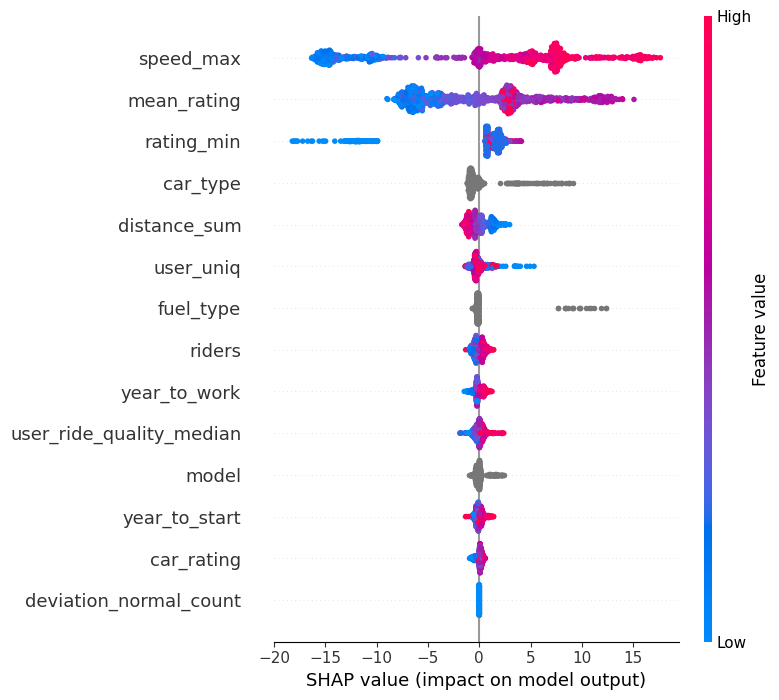

In [75]:
X_sample = X.sample(1000, random_state=RANDOM_STATE)  # –∏—Å–ø–æ–ª—å–∑—É–µ–º –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ –¥–ª—è —Å–∫–æ—Ä–æ—Å—Ç–∏

### SHAP –¥–ª—è CatBoost
explainer_cb = shap.TreeExplainer(best_cb_model)
shap_values_cb = explainer_cb.shap_values(X_sample)

print("SHAP Summary Plot - CatBoost")
shap.summary_plot(shap_values_cb, X_sample)

In [77]:
explainer_lgb = shap.TreeExplainer(best_lgb_model)
shap_values_lgb = explainer_lgb.shap_values(X_lgb)

print("SHAP Summary Plot - LightGBM")
shap.summary_plot(shap_values_lgb, X_lgb)

SHAP Summary Plot - LightGBM


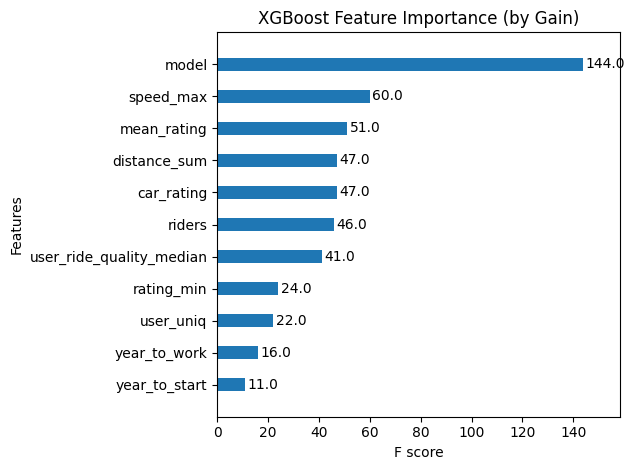

In [84]:
xgb.plot_importance(best_xgb_model,
                    importance_type='weight',
                    height=0.4,
                    grid=False)
plt.title("XGBoost Feature Importance (by Gain)")
plt.tight_layout()
plt.show()

# **–í—ã–≤–æ–¥—ã.**


In [96]:
df = pd.DataFrame(results)
df

model_name  tuning  mean_kfold_score  leaderboard_score  \
0     CatBoostRegressor   False         11.296875               11.9   
1     CatBoostRegressor    True         11.320312               11.8   
2  LGBMRegressor (goss)   False         11.953125               12.6   
3  LGBMRegressor (goss)    True         12.109375               12.6   
4   XGBRegressor (dart)   False         12.015625               12.3   
5   XGBRegressor (dart)    True         16.046875               16.7   

                                               model  
0  <catboost.core.CatBoostRegressor object at 0x7...  
1  <catboost.core.CatBoostRegressor object at 0x7...  
2  <lightgbm.basic.Booster object at 0x7ed2fc8e5d50>  
3  <lightgbm.basic.Booster object at 0x7ed2fc911d90>  
4    <xgboost.core.Booster object at 0x7ed2fb901590>  
5    <xgboost.core.Booster object at 0x7ed2fc8f6210>

üèÜ **–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ –∫–∞—á–µ—Å—Ç–≤—É**

CatBoostRegressor –±–µ–∑ —Ç—é–Ω–∏–Ω–≥–∞ –ø–æ–∫–∞–∑–∞–ª –ª—É—á—à–∏–π mean_kfold_score ‚Äî 11.30, –∏ –Ω–µ–ø–ª–æ—Ö–æ–π leaderboard_score ‚Äî 11.9.

–û–¥–Ω–∞–∫–æ CatBoostRegressor —Å —Ç—é–Ω–∏–Ω–≥–æ–º –ø–æ–∫–∞–∑–∞–ª –ª—É—á—à–∏–π leaderboard_score ‚Äî 11.8, —Å –ø–æ—á—Ç–∏ —Ç–µ–º –∂–µ –∫–∞—á–µ—Å—Ç–≤–æ–º –≤–∞–ª–∏–¥–∞—Ü–∏–∏ (11.32).

**üìå –í—ã–≤–æ–¥:**

–¢—é–Ω–∏–Ω–≥ –æ–∫–∞–∑–∞–ª –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ —Ç–æ–ª—å–∫–æ –Ω–∞ CatBoost. –î–ª—è LGBM –∏ –æ—Å–æ–±–µ–Ω–Ω–æ XGBoost ‚Äî —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —É—Ö—É–¥—à–∏–ª–∏—Å—å, –≤–µ—Ä–æ—è—Ç–Ω–æ –∏–∑-–∑–∞ –Ω–µ–ø–æ–¥—Ö–æ–¥—è—â–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏–ª–∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è.


**üîÅ –°–º–µ—à–∏–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π (–∞–Ω—Å–∞–º–±–ª—å)**

–£—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π CatBoost + LGBM + XGBoost –¥–∞–ª–æ leaderboard_score = 12.0.

**üìå –í—ã–≤–æ–¥:**

–ê–Ω—Å–∞–º–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ —É–ª—É—á—à–∏–ª–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ª—É—á—à–µ–π –æ—Ç–¥–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª—å—é (CatBoost —Å —Ç—é–Ω–∏–Ω–≥–æ–º, 11.8). –û–¥–Ω–∞–∫–æ –æ–Ω–æ –º–æ–≥–ª–æ –ø–æ–≤—ã—Å–∏—Ç—å —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é –∏ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã–º –≤ —É—Å–ª–æ–≤–∏—è—Ö —à—É–º–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.